In [129]:
def file_paths(dataset_directory):
    import glob
    paths =[]
    for x in glob.iglob(dataset_directory + "*.txt"):
        paths.append(x)
    return paths

In [130]:
def file_properties(path):
    import re
    list_of_matches = re.findall("out_(\d+)_(\d+)_(\d+)_(\d+).txt", path)
    arr = list_of_matches.pop()
    return int(arr[0]),int(arr[1]),int(arr[2]),int(arr[3])

In [131]:
def file_reader(str):
    import re
    list_of_matches = re.findall("(........) seconds", str)
    arr = list_of_matches.pop()
    return float(arr)

In [132]:
import pandas as pd
paths= file_paths("Homework_runs/")
properties_list = []
for path in paths:
    with open(path) as file:
        pow,iter,dtype,optimization = file_properties(path)
        str = file.read()
        seconds = file_reader(str)
        properties_list.append([pow,iter,dtype,optimization,seconds])
print(properties_list)
df_MSI = pd.DataFrame(properties_list,columns=["pow","iteration","dtype","optimization","seconds"])
print(df)

[[4, 3, 2, 2, 1.8e-05], [4, 2, 0, 0, 3e-05], [9, 3, 2, 3, 0.110615], [10, 2, 1, 3, 2.772212], [5, 1, 1, 2, 0.000177], [6, 2, 2, 2, 0.000872], [8, 1, 0, 1, 0.01676], [9, 2, 0, 3, 0.110602], [1, 1, 0, 1, 1e-06], [7, 3, 1, 1, 0.001957], [2, 3, 0, 1, 2e-06], [8, 2, 0, 0, 0.030501], [4, 3, 2, 0, 4e-05], [6, 3, 1, 1, 0.000401], [10, 3, 0, 2, 2.74868], [7, 2, 0, 1, 0.002182], [9, 2, 0, 1, 0.132715], [9, 1, 2, 3, 0.110341], [7, 2, 1, 3, 0.001722], [2, 3, 0, 3, 2e-06], [2, 1, 0, 3, 2e-06], [5, 2, 2, 0, 0.00011], [6, 3, 2, 3, 0.000796], [9, 2, 2, 0, 0.274319], [6, 2, 0, 0, 0.000834], [9, 2, 1, 0, 0.255151], [4, 1, 2, 1, 3.9e-05], [7, 1, 1, 1, 0.001982], [1, 2, 0, 0, 1e-06], [3, 2, 0, 0, 7e-06], [7, 2, 1, 1, 0.002031], [4, 2, 2, 0, 0.000153], [6, 1, 2, 1, 0.000685], [5, 1, 1, 3, 0.00011], [9, 3, 2, 1, 0.128926], [8, 2, 1, 2, 0.014181], [4, 1, 2, 0, 7.3e-05], [7, 1, 2, 3, 0.001835], [5, 1, 0, 2, 8.7e-05], [1, 1, 0, 3, 2e-06], [3, 2, 2, 0, 1.7e-05], [10, 2, 0, 2, 2.761824], [10, 1, 2, 0, 2.198413],

In [133]:

def get_list(dataframe):
    max_pow = int(dataframe['pow'].max())
    list_of_y = []
    pow_list=range(0,max_pow+1)
    type_list= range(0,3)
    optimization_list = range(0,4)
    for o in optimization_list:
        list_of_y.append([])
        for dt in type_list:
            list_of_y[o].append([])
            list_of_y[o][dt].append([])
            list_of_y[o][dt].append([])
            list_of_y[o][dt].append([])
            
            for x in pow_list:
                max_y = dataframe.query(f'pow == {x} and dtype=={dt} and optimization=={o}')["seconds"].max()
                list_of_y[o][dt][0].append(max_y)
                min_y = dataframe.query(f'pow == {x} and dtype=={dt} and optimization=={o}')["seconds"].min()
                list_of_y[o][dt][1].append(min_y)
                list_of_y[o][dt][2].append((max_y+min_y)/2)

    return pow_list, type_list, max_pow, list_of_y

In [134]:
import matplotlib.pyplot as plt

def print_plots(pow_list, type_list, max_pow, list_of_y, alpha=.2):
    fig, axs = plt.subplots(2,2)
    colors = ["blue","red","magenta","yellow"]
    type_strings = ["integer","float","double"]
    seconds_range = range(0,6)
    for x in type_list:
        axs[0, 0].fill_between(pow_list,list_of_y[0][x][1], list_of_y[0][x][0],  alpha=alpha, linewidth=0,color=colors[x],label = type_strings[x])
        axs[0, 0].plot(pow_list, list_of_y[0][x][2], linewidth=1,color=colors[x])
        axs[0,0].set_xticks(pow_list,[])
        axs[0,0].set_yticks(seconds_range)

        axs[0, 1].fill_between(pow_list,list_of_y[1][x][1], list_of_y[0][x][0],  alpha=alpha, linewidth=0,color=colors[x],label = type_strings[x])
        axs[0, 1].plot(pow_list, list_of_y[1][x][2], linewidth=1,color=colors[x])
        axs[0,1].set_xticks(pow_list,[])
        axs[0,1].set_yticks(seconds_range)

        axs[1, 0].fill_between(pow_list,list_of_y[2][x][1], list_of_y[0][x][0],  alpha=alpha, linewidth=0,color=colors[x],label = type_strings[x])
        axs[1, 0].plot(pow_list, list_of_y[2][x][2], linewidth=1,color=colors[x])
        axs[1, 0].set_xticks(pow_list,pow_list)
        axs[1, 0].set_yticks(seconds_range)

        axs[1, 1].fill_between(pow_list,list_of_y[3][x][1], list_of_y[0][x][0],  alpha=alpha, linewidth=0,color=colors[x],label = type_strings[x])
        axs[1, 1].plot(pow_list, list_of_y[3][x][2], linewidth=1,color=colors[x])
        axs[1, 1].set_xticks(pow_list, pow_list)
        axs[1, 1].set_yticks(seconds_range)
    axs[0, 0].set_title('No optimization')
    axs[0, 1].set_title('-01')
    axs[1, 0].set_title('-02')
    axs[1, 1].set_title('-03')
    axs[0, 0].set_ylabel('Seconds')
    axs[1, 0].set_ylabel('Seconds')
    axs[1, 0].set_xlabel('Power')
    axs[1, 1].set_xlabel('Power')
    plt.xticks(range(1,max_pow))
    plt.show()

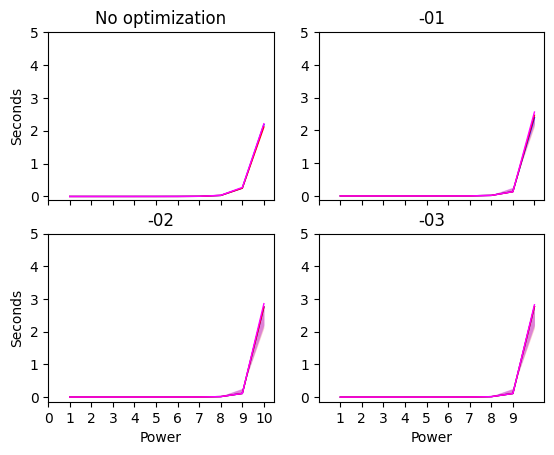

In [135]:
# plot
pow_list,type_list,max_pow, list_of_y = get_list(df_MSI)
print_plots(pow_list, type_list, max_pow, list_of_y)


In [136]:
paths= file_paths("Homework_runs_HP/")
properties_list = []
for path in paths:
    with open(path) as file:
        pow,iter,dtype,optimization = file_properties(path)
        str = file.read()
        seconds = file_reader(str)
        properties_list.append([pow,iter,dtype,optimization,seconds])
print(properties_list)
df_HP = pd.DataFrame(properties_list,columns=["pow","iteration","dtype","optimization","seconds"])


[[4, 3, 2, 2, 1.4e-05], [4, 2, 0, 0, 2.3e-05], [9, 3, 2, 3, 0.462251], [10, 2, 1, 3, 4.208731], [5, 1, 1, 2, 4.9e-05], [6, 2, 2, 2, 0.000463], [8, 1, 0, 1, 0.031169], [9, 2, 0, 3, 0.402699], [1, 1, 0, 1, 2e-06], [7, 3, 1, 1, 0.003895], [2, 3, 0, 1, 3e-06], [8, 2, 0, 0, 0.0848], [4, 3, 2, 0, 1.8e-05], [6, 3, 1, 1, 0.000449], [10, 3, 0, 2, 4.063096], [7, 2, 0, 1, 0.004204], [9, 2, 0, 1, 0.395528], [9, 1, 2, 3, 0.463354], [7, 2, 1, 3, 0.003234], [2, 3, 0, 3, 2e-06], [2, 1, 0, 3, 2e-06], [5, 2, 2, 0, 0.000159], [6, 3, 2, 3, 0.000673], [9, 2, 2, 0, 0.603692], [6, 2, 0, 0, 0.001631], [9, 2, 1, 0, 0.730468], [4, 1, 2, 1, 9e-06], [7, 1, 1, 1, 0.003971], [1, 2, 0, 0, 5e-06], [3, 2, 0, 0, 7e-06], [7, 2, 1, 1, 0.004155], [4, 2, 2, 0, 1.9e-05], [6, 1, 2, 1, 0.000452], [5, 1, 1, 3, 7.3e-05], [9, 3, 2, 1, 0.44937], [8, 2, 1, 2, 0.029222], [4, 1, 2, 0, 1.9e-05], [7, 1, 2, 3, 0.003376], [5, 1, 0, 2, 5e-05], [1, 1, 0, 3, 1e-06], [3, 2, 2, 0, 5e-06], [10, 2, 0, 2, 4.13089], [10, 1, 2, 0, 5.103902], [5, 

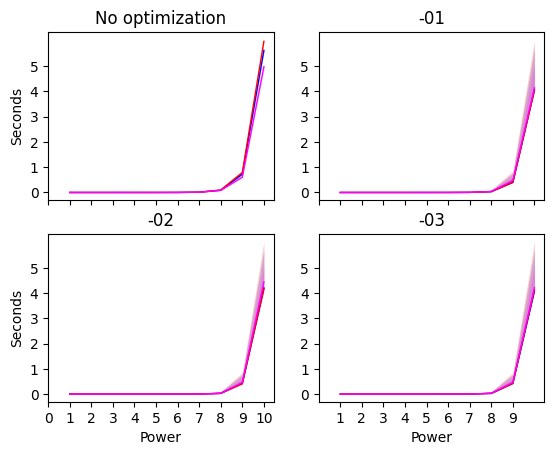

In [137]:
pow_list,type_list,max_pow, list_of_y = get_list(df_HP)
print_plots(pow_list, type_list, max_pow, list_of_y)